In [1]:
import wandb
import numpy as np
wandb.login()
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ae21b105 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
# Load the dataset
(x_train, y_train), (_, _) = fashion_mnist.load_data()

# Plot one sample image for each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
font = {'family' : 'Comic Sans MS','weight' : 'normal', 'size'   : 30}  
for i in range(10):
    # Initialize wandb
    wandb.init(project="Reporter", entity="A1_DA6401_DL")
    images = []
    #idx = next(j for j, label in enumerate(y_train) if label == i)
    idx = (np.arange(60000)[y_train == i])[np.random.randint(0, 6000,size=10)]
    for j in idx:
        plt.imshow(x_train[j], cmap='gray')
        plt.title(class_names[i],fontdict=font)
        plt.axis('off')
        images.append(wandb.Image(plt.gcf()))
        plt.close()

    # Log images to wandb
    wandb.log({"Sample Images": images})
    wandb.finish()

In [1]:
import source
import numpy as np
import wandb
from keras.datasets import fashion_mnist
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ae21b105 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
(x_train, y_train), (_, _) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,-1)/255.0
wandb.init(project="Reporter", entity="A1_DA6401_DL")
# Lets take the first 10 datapoints
x_train = x_train[:5]
y_train = y_train
# A simple network
arch = [784, 64, 10]
activation_sequence =   ['relu', 'softmax']

md1 = source.FeedForwardNeuralNetwork(arch=arch, activation_sequence=activation_sequence)
prediction = md1.forward_call(x_train).astype(np.float32)
prediction = prediction.tolist()
my_table = wandb.Table(columns=class_names, data=prediction)

wandb.log({"prediction_table" : my_table})

In [1]:
import source
import numpy as np
import wandb
from keras.datasets import fashion_mnist
wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ae21b105 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
(x_train, y_train), (_, _) = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.1,stratify=y_train)

x_train = x_train.reshape(54000,-1)/255.0
y_train = source.one_hot_numpy(y_train)
x_cv = x_cv.reshape(6000,-1)/255.0
y_cv = source.one_hot_numpy(y_cv)

In [3]:
arch = [784, 128, 10]
activation_sequence =   ['relu', 'softmax']
optimizer = "adam"
learning_rate = 1e-3
loss = "mean_squared_error"
initialization = "Xavier"
momentum = 0.95
weight_decay = 1e-6
beta_rms = 0.95
beta_1 = 0.9
beta_2 = 0.99
md1 = source.FeedForwardNeuralNetwork(arch=arch, activation_sequence=activation_sequence, optimizer=optimizer,
                                      learning_rate=learning_rate,weight_decay= weight_decay, loss=loss,initialization=initialization,momentum=momentum,beta_rms=beta_rms,
                                      beta_1=beta_1,beta_2=beta_2)

In [5]:
batch_train = source.Batchloader(x_train, y_train, batch_size=64,shuffle=True)
batch_test = source.Batchloader(x_cv, y_cv, batch_size=64,shuffle=False)

In [6]:
epochs = 10
run = wandb.init(entity="A1_DA6401_DL", project="Reporter", config={"opt" : optimizer, "loss": loss,})
run.name = f"Loss_{loss}_run1"
for epoch in range(1,epochs+1):
    #i = 0
    #print(f"Epoch : {epoch}")
    for X_, y_ in batch_train:

        md1.train_step(X_, y_, epoch)

    train_pred = md1.forward_call(inputs_=x_train)
    test_pred = md1.forward_call(inputs_=x_cv)

    loss_train = source.find_loss(y_pred= train_pred, y_true =y_train, loss="mean_squared_error")
    loss_cv = source.find_loss(y_pred= test_pred, y_true = y_cv, loss = "mean_squared_error")

    train_pred = md1.forward_call(inputs_=x_train,threshold=True)
    test_pred = md1.forward_call(inputs_=x_cv,threshold=True)

    accuracy_train = source.accuracy(train_pred, y_train)
    accuracy_cv = source.accuracy(test_pred,  y_cv)

    run.log(data={"loss_train" : loss_train, "loss_cv" : loss_cv, "acc_train" : accuracy_train, "acc_cv" : accuracy_cv})
    if epoch%1 == 0:
        print(F"Epoch {epoch} || loss_train : {loss_train} | loss_test : {loss_cv} || acc_train : {accuracy_train} | acc_test : {accuracy_cv} ||")

Epoch 1 || loss_train : 0.004193768556922985 | loss_test : 0.012604924446758323 || acc_train : 0.5225925925925926 | acc_test : 0.5206666666666667 ||
Epoch 2 || loss_train : 0.003846355236223297 | loss_test : 0.01146837149490602 || acc_train : 0.5997777777777777 | acc_test : 0.6048333333333333 ||
Epoch 3 || loss_train : 0.00363460790211636 | loss_test : 0.010875291607597048 || acc_train : 0.6430185185185185 | acc_test : 0.6448333333333334 ||
Epoch 4 || loss_train : 0.0035237199284871346 | loss_test : 0.010601909246044894 || acc_train : 0.6646111111111112 | acc_test : 0.6625 ||
Epoch 5 || loss_train : 0.0034792549004305914 | loss_test : 0.010434976092408382 || acc_train : 0.673 | acc_test : 0.6731666666666667 ||
Epoch 6 || loss_train : 0.003445495226550281 | loss_test : 0.010309923942409888 || acc_train : 0.6792962962962963 | acc_test : 0.6808333333333333 ||
Epoch 7 || loss_train : 0.00338136754993545 | loss_test : 0.01009155831790008 || acc_train : 0.6911481481481482 | acc_test : 0.6943

In [9]:
cv_pred = md1.forward_call(inputs_=x_cv,threshold=True)

from sklearn.metrics import confusion_matrix

cv_pred = np.argmax(cv_pred, axis=1)
cv_true = np.argmax(y_cv, axis = 1)
cm = confusion_matrix(cv_true, cv_pred)
wandb.log({
    "Confusion Matrix": wandb.plot.confusion_matrix(
        y_true=cv_true,
        preds=cv_pred,
        class_names=class_names,
        title="Confusion Matrix"
    )
})


In [10]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize wandb
#wandb.init(project="creative-confusion-matrix")

# Example true and predicted labels
y_true = cv_true
y_pred = cv_pred


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with custom colors and annotations
plt.figure(figsize=(9,7))
font = {'family' : 'Comic Sans MS','weight' : 'normal', 'size'   : 12}
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)
plt.title("Confusion Matrix", fontdict= font)
plt.xlabel("Predicted",fontdict=font)
plt.ylabel("True", fontdict=font)
plt.tight_layout()
# Log the plot to wandb
wandb.log({"Confusion Matrix_chk": wandb.Image(plt.gcf())})
plt.close()

# Finalize the wandb run
wandb.finish()

acc_cv,▁▄▅▅▆▆▆▇██
acc_train,▁▃▅▅▆▆▆▇██
loss_cv,█▆▅▄▄▃▃▂▂▁
loss_train,█▆▅▄▄▃▃▂▂▁
acc_cv,0.755
acc_train,0.74643
loss_cv,0.00904
loss_train,0.00306


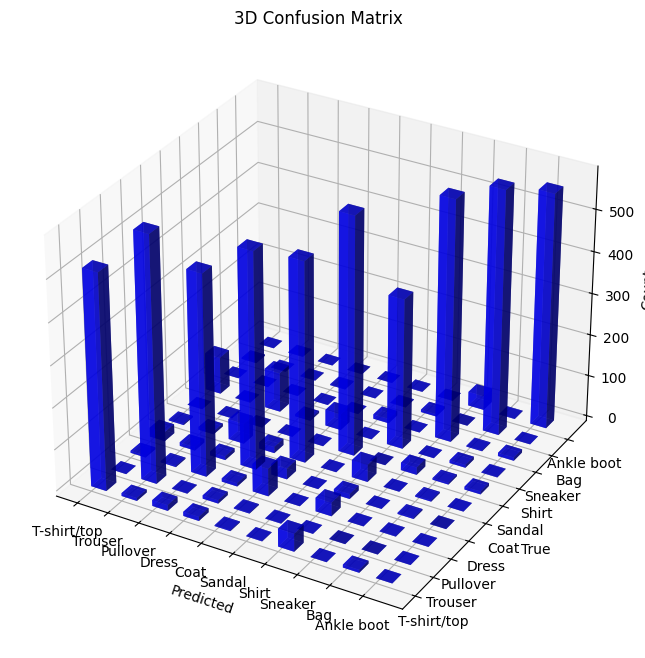

In [12]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

# Initialize wandb
#wandb.init(project="3d-confusion-matrix")

# Example true and predicted labels
y_true = cv_true
y_pred = cv_pred

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D bars
xpos, ypos = np.meshgrid(np.arange(cm.shape[0]), np.arange(cm.shape[1]))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = dy = 0.5 * np.ones_like(zpos)
dz = cm.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.7)
ax.set_xticks(np.arange(cm.shape[0]))
ax.set_yticks(np.arange(cm.shape[1]))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_zlabel('Count')
plt.title("3D Confusion Matrix")
plt.show()

# Log the plot to wandb
#wandb.log({"3D Confusion Matrix": wandb.Image(plt)})
#plt.close()

# Finalize the wandb run
#wandb.finish()

In [33]:
wandb.finish()

acc_cv,▁▃▆▇█
acc_train,▁▄▆▇█
loss_cv,█▅▃▂▁
loss_train,█▅▃▂▁
acc_cv,0.87
acc_train,0.88087
loss_cv,0.38026
loss_train,0.32713
